# PART 1: Tutorial on basic handling of digital images:

    by Raul Benitez
    Barcelona East School of Engineering, Universitat Politècnica de Catalunya
    Master's Degree in Interdisciplinary and Innovative Engineering
    Computer Vision 
    raul.benitez@upc.edu
    

# Introduction:

Welcome to this tutorial on basic handling of digital images in Python. We are going to use image processing libraries skimage. 


## Reading a grayscale image

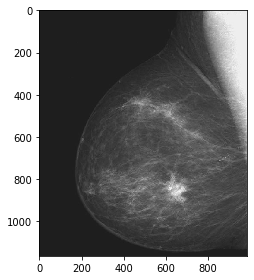

In [2]:
import skimage as sk # load skimage libraries
from skimage.io import imread 
I = sk.io.imread('/content/image1.tif') # read image using imread function
sk.io.imshow(I) # visualize image using imshow function
sk.io.show() 

Check image size:

In [3]:
I.shape # Size of image in pixels

(1164, 984)

Access to origin pixel (top-left, DARK REGION) 

In [4]:
I[0,0] # Pixel value of first row, first column

38

Access to top-right region (LIGHT REGION)

In [5]:
I[0,983] # Pixel value of first row, last column

238

Digital encoding of the pixel grayscale levels: 

In [6]:
I.dtype

dtype('uint8')

'uint8' stands for *unsigned integer of 8 bits*, meaning that each pixel in the image is encoded with 8 bits representing an integer in the range [0,255]. In general, a n-bit grayscale image allows a range in levels from 0 to $2^n - 1$. 

## Represent pixels along a certain row: 

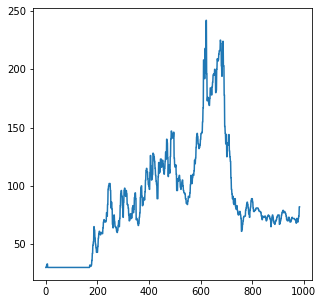

In [7]:
Irow = I[850,:] # pixels along the row 850 

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
plt.plot(Irow)
plt.show()

## Read a RGB color image:

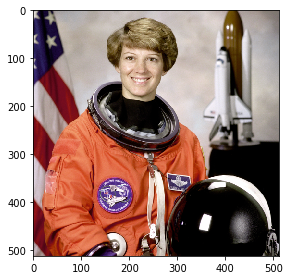

M = 512 columns, N = 512 rows, NC = 3 color channels


In [8]:
import skimage as sk # load skimage libraries
IC = sk.data.astronaut() # load a color image from the skimage built-in dataset
# change colormap to visualize image
sk.io.imshow(IC) # visualize image using imshow function
sk.io.show() 
print('M = {} columns, N = {} rows, NC = {} color channels'.format(*IC.shape)) # Print out image size

Check image size:

In [9]:
IC.shape

(512, 512, 3)

## Convert color to grayscale:

$IG = 0.2125 \cdot R + 0.7154\cdot G + 0.0721\cdot B$


In [10]:
IG = sk.color.rgb2gray(IC)
IG.shape

(512, 512)

In [15]:
IG_manual = (0.2125*IC[:,:,0]+0.7154*IC[:,:,1]+0.0721*IC[:,:,2])/255

In [16]:
IG[0,0]

0.5834349019607843

In [17]:
IG_manual[0,0]

0.5834349019607843

In [19]:
import numpy as np
np.sum(IG-IG_manual)

-1.5090290128583206e-12

## Using colormaps

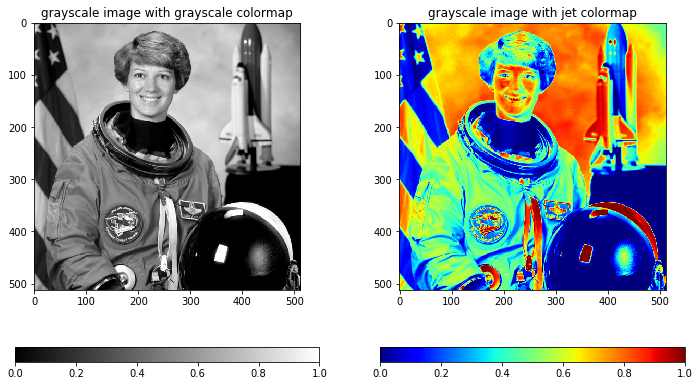

In [ ]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(1,2,figsize=(12,7))
ax = axes.ravel() # convert axes to a 1d array
im1 = ax[0].imshow(IG,cmap=plt.cm.gray) # visualize image using imshow function using a grayscale colormap
ax[0].set_title('grayscale image with grayscale colormap') # set figure title
fig.colorbar(im1,ax=ax[0],orientation='horizontal') # visualize colorbar 
im2 = ax[1].imshow(IG,cmap=plt.cm.jet) # visualize image using imshow function using a grayscale colormap
ax[1].set_title('grayscale image with jet colormap') # set figure title
fig.colorbar(im2,ax=ax[1],orientation='horizontal') # visualize colorbar 
sk.io.show() 

## Miscellaneous operations and extra stuff:

# Convert image to different formats:
Convert an image to unsigned byte format, with values in [0, 255].


In [ ]:
from skimage.util import img_as_ubyte
IGB = img_as_ubyte(IG)

/Users/raulbenitez/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


## Image histogram:

Distribution of pixel values, how many pixels are there in the image for each grayscale level? 


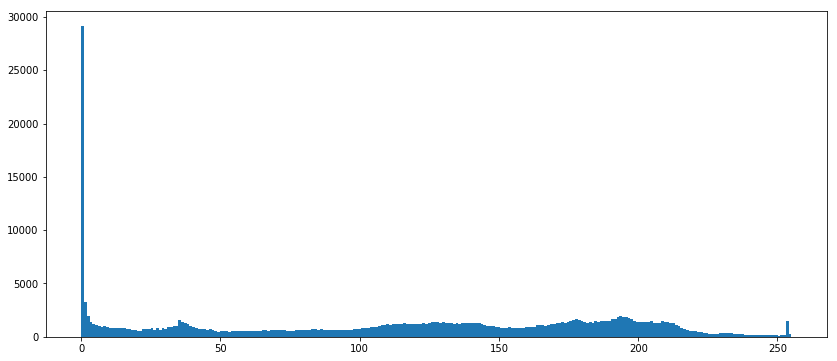

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

# reshape the uint8 image as 1d array:
v = IGB.reshape(IGB.shape[0]*IGB.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()

There are too many zeros in the image, take them out in order to properly visualize the distribution: 

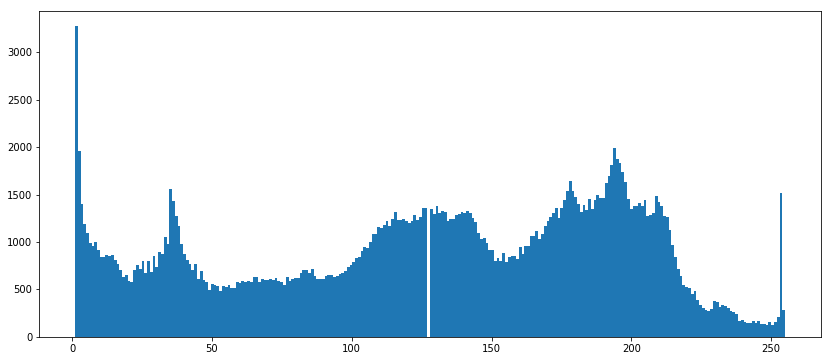

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

# keep only pixels with a value higher than zero: 
v = v[v>0]
fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()

 Represent the normalized histogram corresponding to the probability distribution function of the graylevel pixel occurence

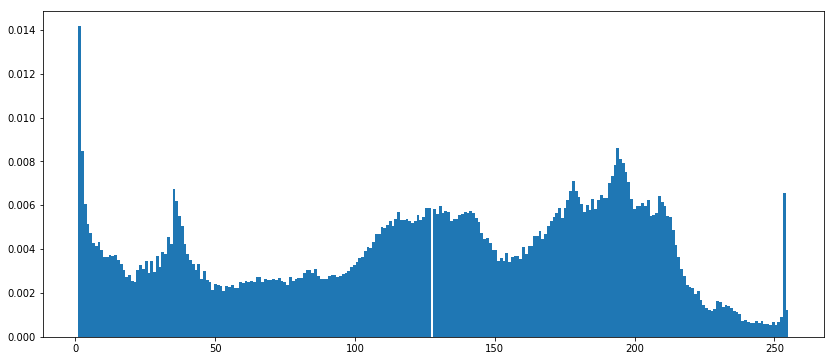

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

# keep only pixels with a value higher than zero: 
fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=True)
plt.show()

Cummulative probability distribution function (cdf) of grayscale levels: Area over the curve of the normalized histogram

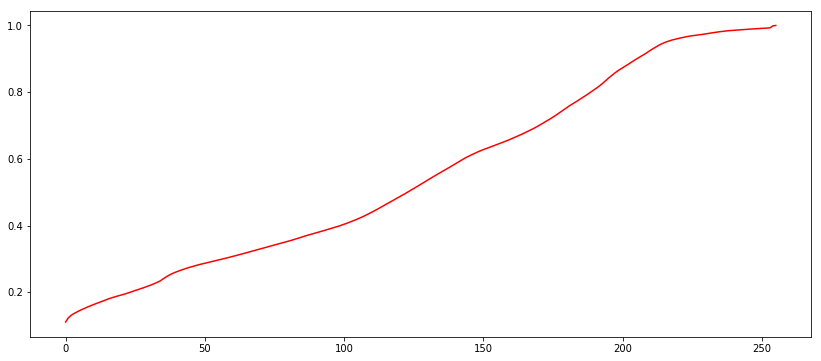

In [ ]:
 from skimage import exposure

img_cdf, bins = exposure.cumulative_distribution(IGB, 255)
fig = plt.figure(figsize=(14, 6))
plt.plot(bins,img_cdf,'r')
plt.show()

Compute the median of the image (grayscale level at which the cdf is 0.5): 

In [ ]:
v = IGB.reshape(IGB.shape[0]*IGB.shape[1],1)
np.median(v)

123.0

# Part 2 EXERCISES: 

The following tasks and exercises should be individually solved by all students. A jupyter notebook Python code with solutions should be uploaded to the digital campus ATENEA before next laboratory session. 

### Task 1: 
Download a RGB color image from the web ans save it to your working directory

### Task 2: 

Load the image in Python and answer the following questions:

    a) How many pixels are there in the image?
    b) How many channels, rows and columns?
    c) What is the format in which each pixel is encoded (number of bits)? 
    d) How may pixels are need in order to encode the whole image? 

### Task 3: 

Convert the color image to grayscale and answer the questions: 

    a) How many pixels of the image have a grayscale level equal zero? 
    b) What is the total fracion of zero-valued pixels in the image?

### Task 4: 

Compare the following two approaches to convert the color image to grayscale: 

    Approach 1: Using the skimage function sk.color.rgb2gray ans in the example above. 
    Approach 2: Applyting the transformation $IG = 0.2125 \cdot R + 0.7154\cdot G + 0.0721\cdot B$ 
where R,G and B are the Red, Green and Blue color channels of the image.

Are both results completly equivalent? Explain. 

### Task 5: 

Create a figure arranged in 1 columns and 3 rows with each panel represents the histogram of each color channel of the color image. Each panel should have a subtitle and the axis should be properly labeled. 

### Task 6: 
Represent the cummulative probability distribution of the grayscale image and indicate which is the median pixel value. Make sure the axis are properly labeled in the figure. 

### Task 7: 

Obtain the mean and standard deviation of the pixel values in the image

### Task 8: 

Binarize the image by setting to one the pixels with a value larger or equal than the median and to zero the pixels below the median.

### Task 9: 

Export the figures in the report in 'png' format. 

### Task 10:  
Provide a list of 10 new different things that you have learned after following this tutorial. 